In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [2]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [4]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [5]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [6]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [7]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [8]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [9]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1

## (a)

In [10]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

## YOUR CODE STARTS HERE

# Plot column value (e.g. Adj Close, Volume) by company on same plot
def plot_col_by_company_group(df, col_name):
    fig, ax = plt.subplots()
    for name, group in df.groupby('company_name'):
        group.plot(ax=ax, y=col_name, label=name, title=f"{col_name} by Company", xlabel="Date", ylabel=col_name, figsize=(15,10))





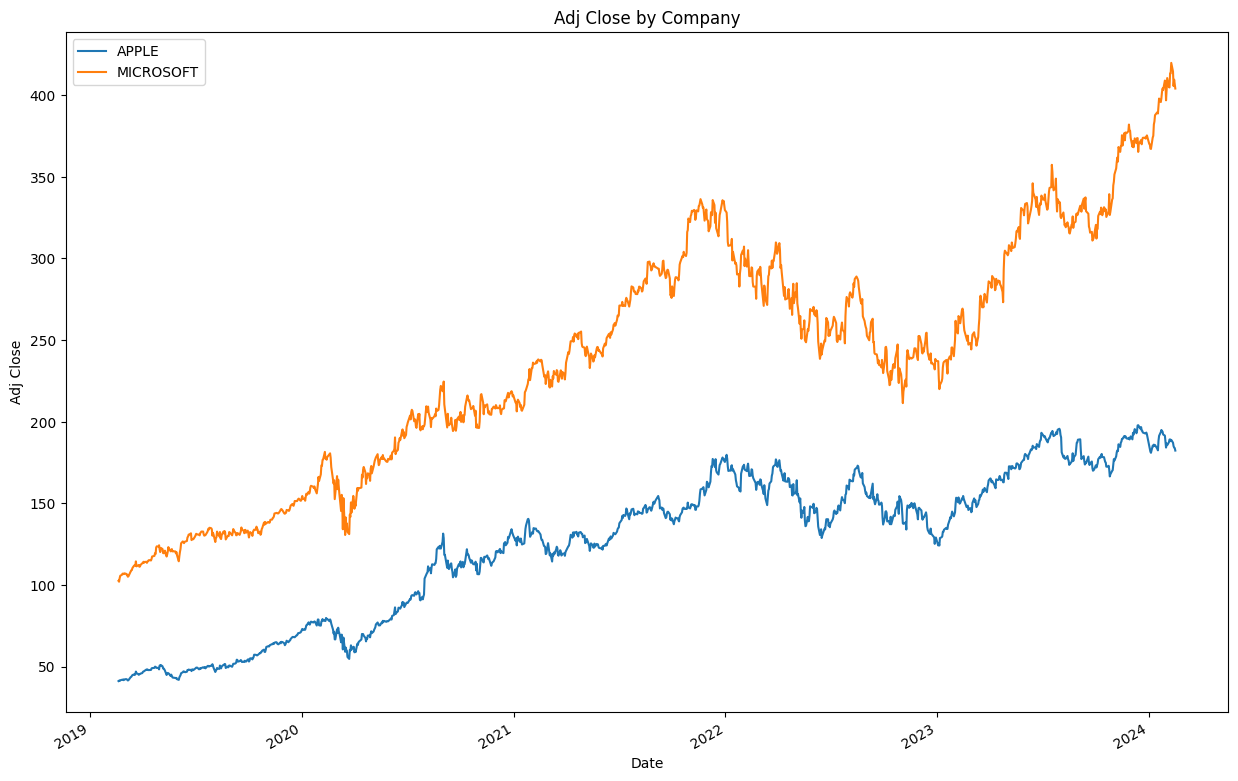

In [11]:
# Plot Adj Close by company on same plot
plot_col_by_company_group(stocks_df, 'Adj Close')

**Enter answer here:**Use 1-2 sentences to comment whether you see any trends over time and how Microsoft and Apple stock prices compare to each other.

Initially(2019) we see that Microsoft starts growing at around 100 and Apple at around 50 closing stock price. It is also noticeable that Microsoft and apple have dips and peaks during the same times (year). Eventhough they have the same trends, i can observed that during the 2023 - 2024 period, Microsoft increases much faster than Apple.

## (b)

In [12]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
Mstocks_weekly = microsoft_df.resample('W').mean()
Mstocks_weekly



,Adj Close
Date,
2019-02-24,103.575401
2019-03-03,106.741396
2019-03-10,105.966560
2019-03-17,108.791780
2019-03-24,112.325195
...,...
2024-01-21,392.344460
2024-01-28,400.613165
2024-02-04,405.428265


In [13]:
Mstocks_monthly = microsoft_df.resample('M').mean()
Mstocks_monthly

,Adj Close
Date,
2019-02-28,105.111517
2019-03-31,109.594991
2019-04-30,116.887392
2019-05-31,120.511057
2019-06-30,126.109168
...,...
2023-10-31,327.670047
2023-11-30,367.322100
2023-12-31,371.890282


In [14]:
Mstocks_quarterly = microsoft_df.resample('Q').mean()
Mstocks_quarterly

,Adj Close
Date,
2019-03-31,108.358171
2019-06-30,121.080347
2019-09-30,131.607784
2019-12-31,141.042020
2020-03-31,158.377493
2020-06-30,175.313684
2020-09-30,203.370720
2020-12-31,208.726042
2021-03-31,225.802912


In [15]:
Mstocks_semi_annually = microsoft_df.resample('6M').mean()
Mstocks_semi_annually

,Adj Close
Date,
2019-02-28,105.111517
2019-08-31,122.691497
2020-02-29,147.234173
2020-08-31,180.048692
2021-02-28,212.580334
2021-08-31,255.479178
2022-02-28,306.777727
2022-08-31,271.480179
2023-02-28,241.078323


In [16]:
Mstocks_annually = microsoft_df.resample('A').mean()
Mstocks_annually

,Adj Close
Date,
2019-12-31,128.272892
2020-12-31,186.712883
2021-12-31,269.500621
2022-12-31,264.701494
2023-12-31,312.156067
2024-12-31,396.153662


<Axes: xlabel='Date', ylabel='Adj Close'>

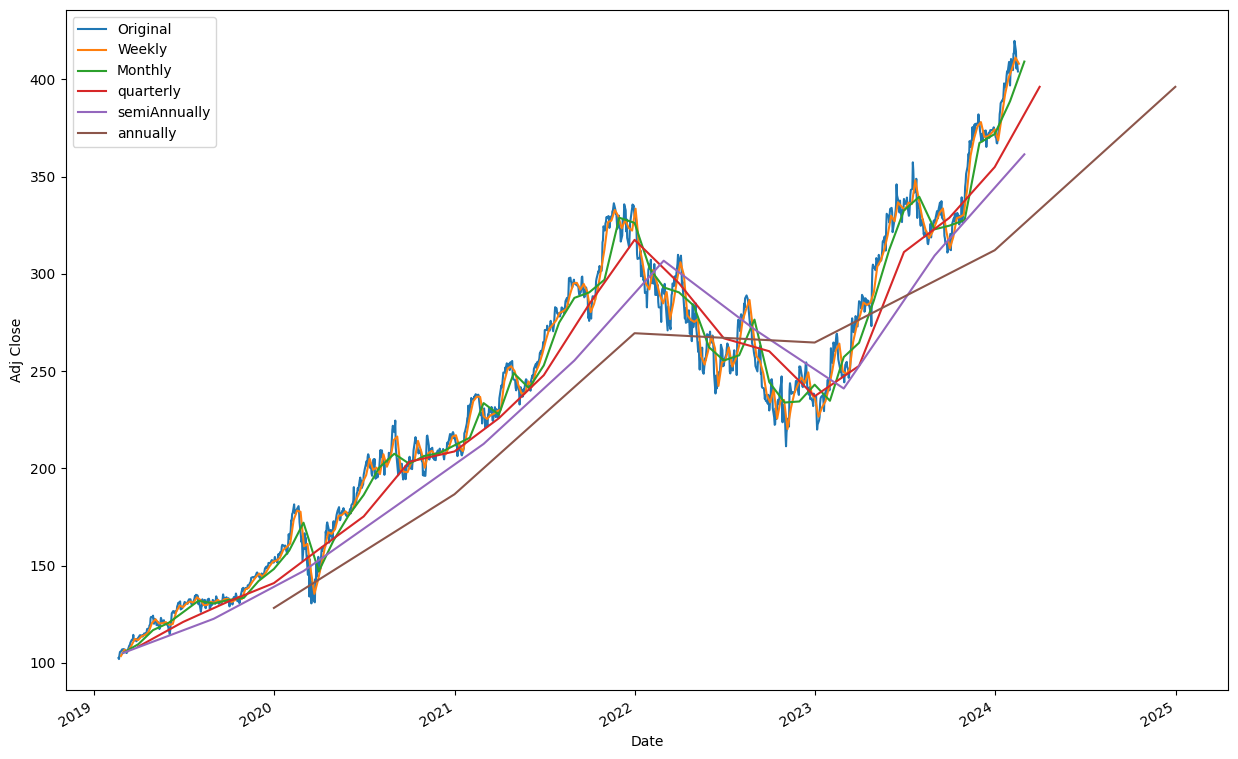

In [17]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

##YOUR CODE STARTS HERE


fig, ax = plt.subplots(figsize=(15,10))
(microsoft_df).plot(ax=ax, y='Adj Close', label='Original', xlabel="Date", ylabel="Adj Close")
Mstocks_weekly.plot(ax =ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
Mstocks_monthly.plot(ax= ax, y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
Mstocks_quarterly.plot(ax=ax, y='Adj Close', label='quarterly', xlabel="Date", ylabel="Adj Close")
Mstocks_semi_annually.plot(ax=ax, y='Adj Close', label='semiAnnually', xlabel="Date", ylabel="Adj Close")
Mstocks_annually.plot(ax=ax, y='Adj Close', label='annually', xlabel="Date", ylabel="Adj Close")





In [18]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
Astocks_weekly = apple_df.resample('W').mean()
Astocks_weekly


,Adj Close
Date,
2019-02-24,41.335278
2019-03-03,41.952009
2019-03-10,41.940459
2019-03-17,43.868744
2019-03-24,45.672845
...,...
2024-01-21,186.387165
2024-01-28,193.784720
2024-02-04,187.137207


In [19]:
Astocks_monthly = apple_df.resample('M').mean()
Astocks_monthly

,Adj Close
Date,
2019-02-28,41.623787
2019-03-31,44.114187
2019-04-30,48.259177
2019-05-31,46.151073
2019-06-30,46.621609
...,...
2023-10-31,174.216515
2023-11-30,185.564134
2023-12-31,194.060874


In [20]:
Astocks_quarterly = apple_df.resample('Q').mean()
Astocks_quarterly

,Adj Close
Date,
2019-03-31,43.427180
2019-06-30,47.003151
2019-09-30,50.633826
2019-12-31,62.521347
2020-03-31,71.651587
2020-06-30,75.705388
2020-09-30,106.830522
2020-12-31,117.963602
2021-03-31,126.084180


In [21]:
Astocks_semi_annually = apple_df.resample('6M').mean()
Astocks_semi_annually

,Adj Close
Date,
2019-02-28,41.623787
2019-08-31,47.428129
2020-02-29,65.268842
2020-08-31,83.170488
2021-02-28,120.767233
2021-08-31,131.784954
2022-02-28,158.041691
2022-08-31,154.836514
2023-02-28,143.664001


In [22]:
Astocks_annually = apple_df.resample('A').mean()
Astocks_annually

,Adj Close
Date,
2019-12-31,52.102354
2020-12-31,93.275343
2021-12-31,138.846599
2022-12-31,153.328144
2023-12-31,171.901758
2024-12-31,187.106946


<Axes: xlabel='Date', ylabel='Adj Close'>

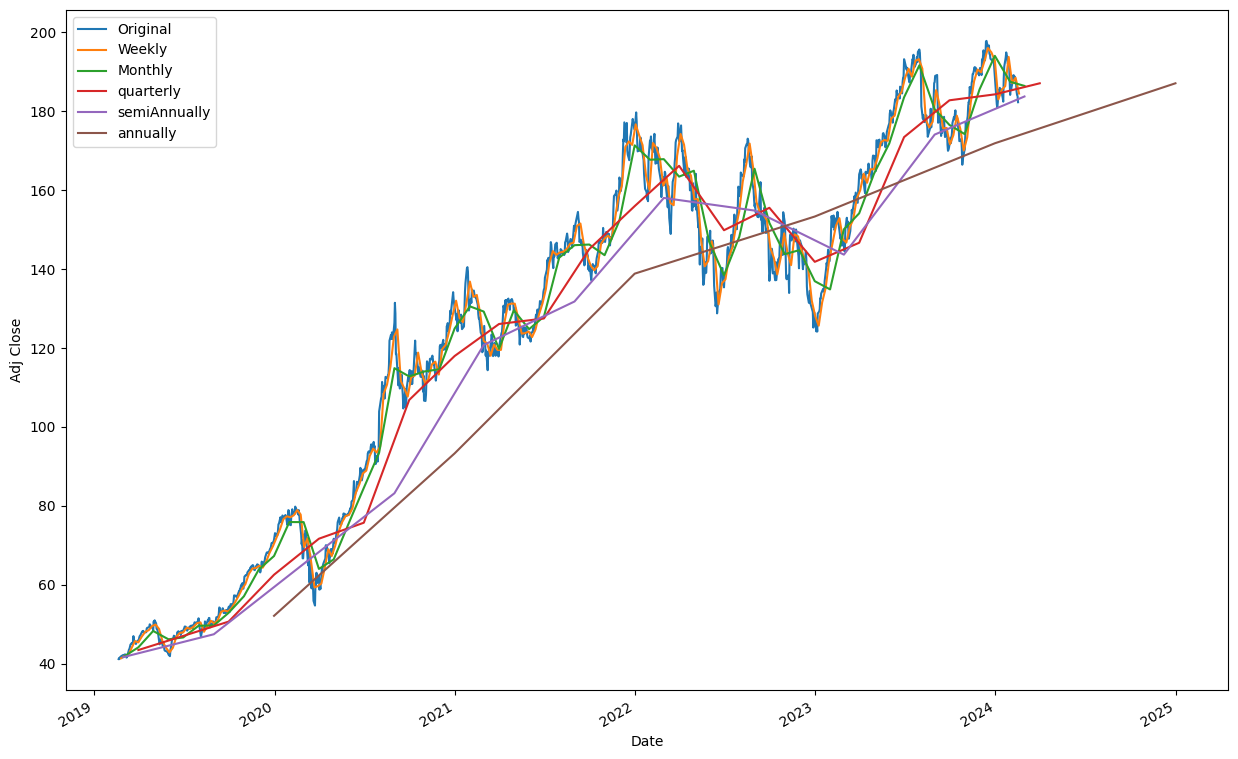

In [23]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE

fig, ax = plt.subplots(figsize=(15,10))
(apple_df).plot(ax=ax, y='Adj Close', label='Original', xlabel="Date", ylabel="Adj Close")
Astocks_weekly.plot(ax =ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
Astocks_monthly.plot(ax= ax, y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
Astocks_quarterly.plot(ax=ax, y='Adj Close', label='quarterly', xlabel="Date", ylabel="Adj Close")
Astocks_semi_annually.plot(ax=ax, y='Adj Close', label='semiAnnually', xlabel="Date", ylabel="Adj Close")
Astocks_annually.plot(ax=ax, y='Adj Close', label='annually', xlabel="Date", ylabel="Adj Close")


## (c)

**Enter answer here:**Downsampling helps to smoothen the data and see long term trends but since it scales from a higher frequency to a lower frequency it can be difficult to see when certain trends occur specifically. A monthly might be appropriate to capture significant trends while reducing noise. **bold text**

# Q2

## (a)

In [24]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

## YOUR CODE STARTS HERE
monthly_return =  Mstocks_monthly.pct_change()
Mstocks_monthly["monthly_return"] = monthly_return

Mstocks_monthly.head(5)

,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [25]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE
monthly_return =  Astocks_monthly.pct_change()
Astocks_monthly["monthly_return"] = monthly_return

Astocks_monthly.head(5)

,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


**Enter answer here:** The first month is NAN because there is no previous month to compare, when calculating monthly return which is found using pct_change()

## (b)

<Axes: xlabel='Date', ylabel='return'>

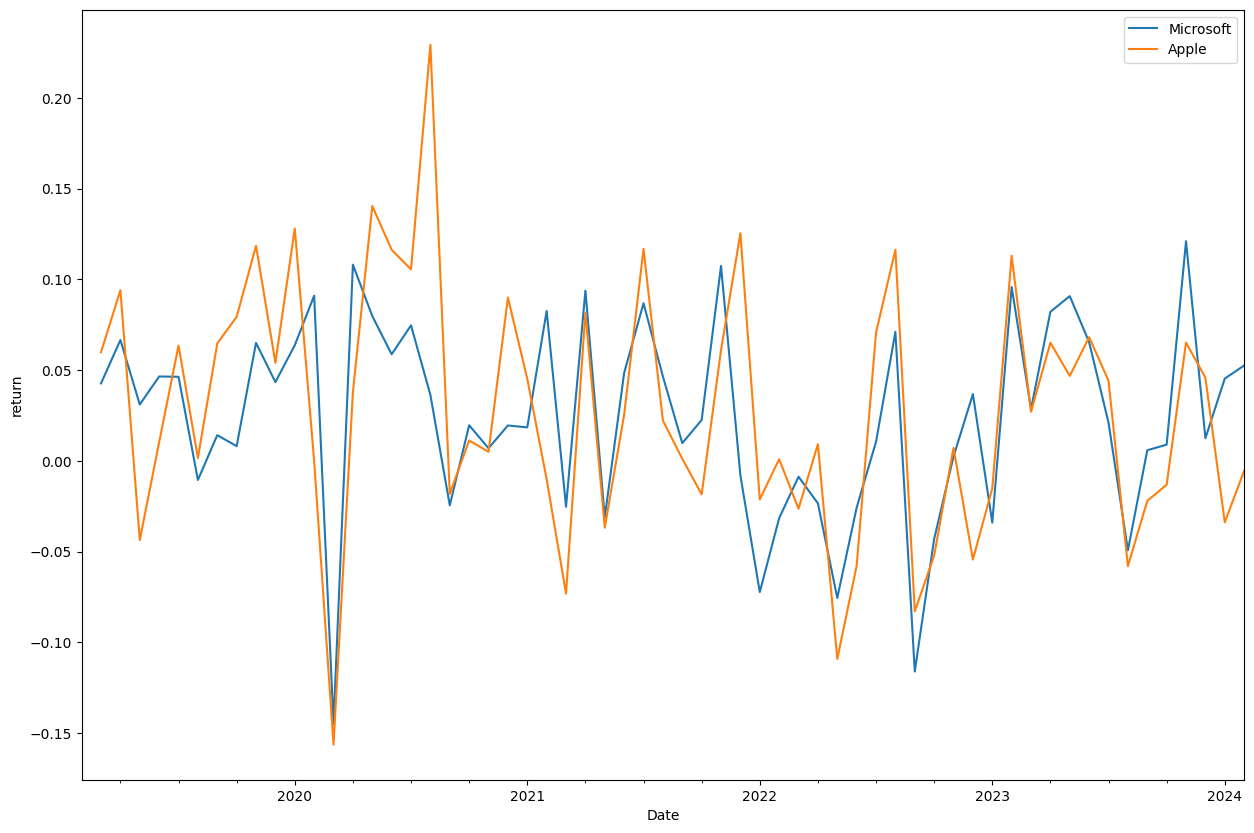

In [26]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE

fig, ax = plt.subplots(figsize=(15,10))
Mstocks_monthly.plot(ax=ax, y='monthly_return', label='Microsoft', xlabel="Date", ylabel="return")
Astocks_monthly.plot(ax=ax, y='monthly_return', label='Apple', xlabel="Date", ylabel="return")


**Enter answer here:** Consistent peaks and dips can be seen in both monthly returns. However in Q1(a) we cannot  see the relative outperformance or underperformance for each stock. This information is not be as evident in the plot of the raw stock prices in Q1. In additon the monthly return helps us performance change as well.  


# Q3

## (a)

In [27]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE
stocks_exp_01 = Mstocks_monthly.ewm(alpha=0.1, adjust=False).mean()
stocks_exp_03 = Mstocks_monthly.ewm(alpha=0.3, adjust=False).mean()
stocks_exp_05 = Mstocks_monthly.ewm(alpha=0.5, adjust=False).mean()
stocks_exp_07 = Mstocks_monthly.ewm(alpha=0.7, adjust=False).mean()
stocks_exp_09 = Mstocks_monthly.ewm(alpha=0.9, adjust=False).mean()




<Axes: xlabel='Date', ylabel='Adj Close'>

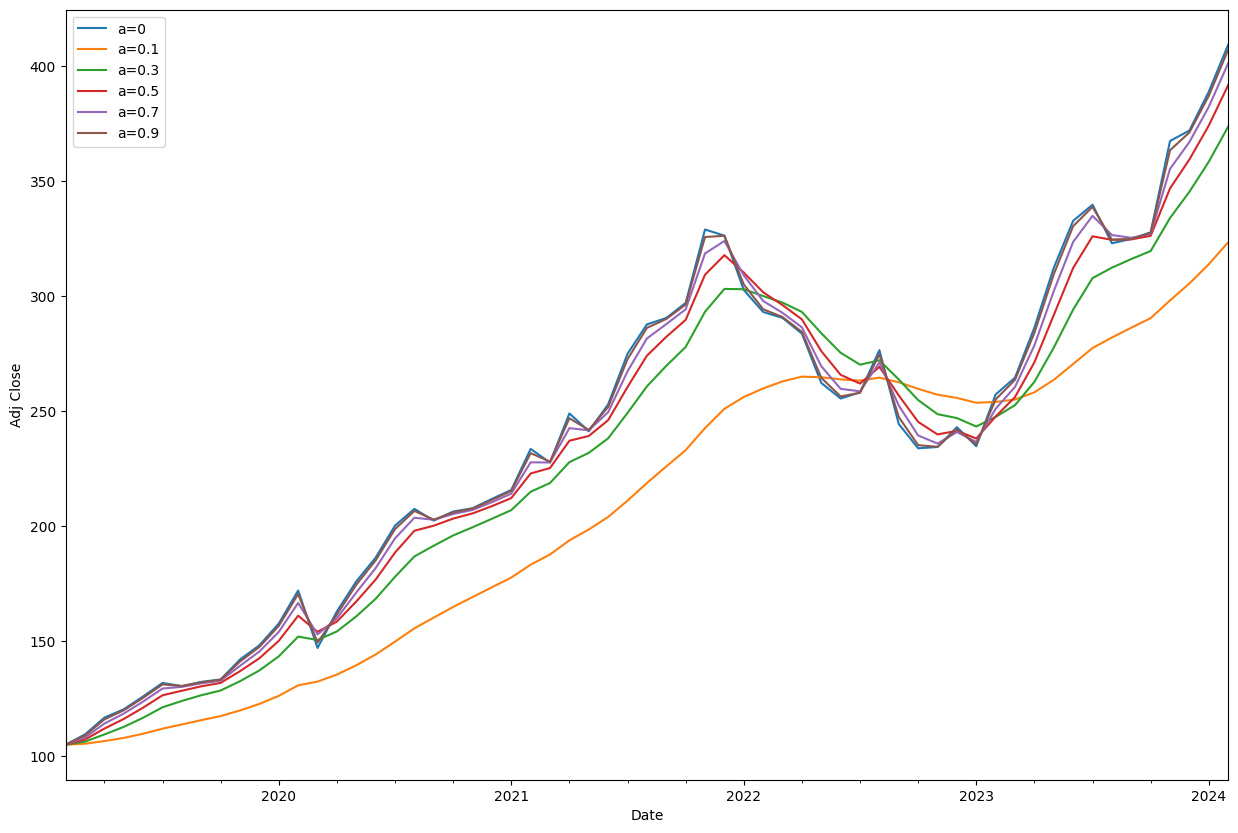

In [28]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (6 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(figsize=(15,10))
Mstocks_monthly.plot(ax=ax, y='Adj Close', label='a=0', xlabel="Date", ylabel="Adj Close")
stocks_exp_01.plot(ax=ax, y='Adj Close', label='a=0.1', xlabel="Date", ylabel="Adj Close")
stocks_exp_03.plot(ax=ax, y='Adj Close', label='a=0.3', xlabel="Date", ylabel="Adj Close")
stocks_exp_05.plot(ax=ax, y='Adj Close', label='a=0.5', xlabel="Date", ylabel="Adj Close")
stocks_exp_07.plot(ax=ax, y='Adj Close', label='a=0.7', xlabel="Date", ylabel="Adj Close")
stocks_exp_09.plot(ax=ax, y='Adj Close', label='a=0.9', xlabel="Date", ylabel="Adj Close")



In [29]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE
Astocks_exp_01 = Astocks_monthly.ewm(alpha=0.1, adjust=False).mean()
Astocks_exp_03 = Astocks_monthly.ewm(alpha=0.3, adjust=False).mean()
Astocks_exp_05 = Astocks_monthly.ewm(alpha=0.5, adjust=False).mean()
Astocks_exp_07 = Astocks_monthly.ewm(alpha=0.7, adjust=False).mean()
Astocks_exp_09 = Astocks_monthly.ewm(alpha=0.9, adjust=False).mean()



<Axes: xlabel='Date', ylabel='Adj Close'>

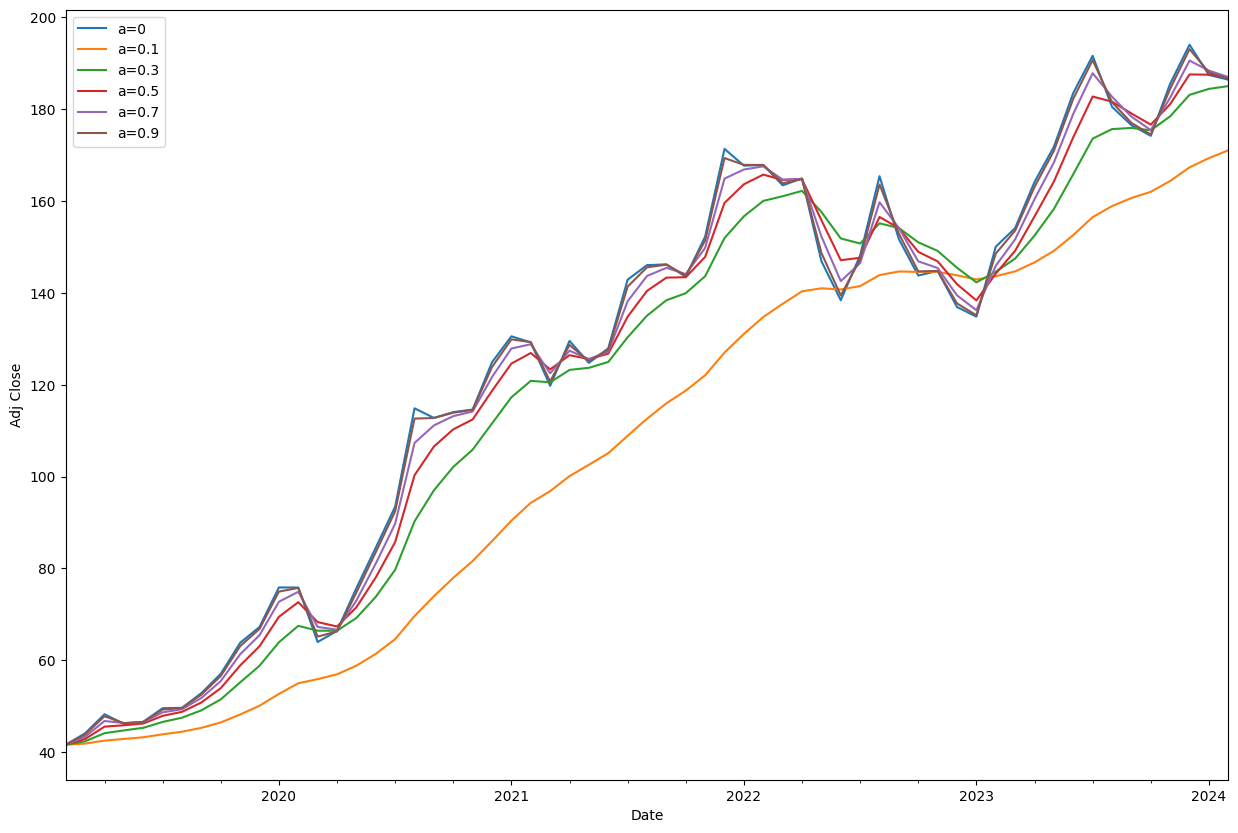

In [30]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (6 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(figsize=(15,10))
Astocks_monthly.plot(ax=ax, y='Adj Close', label='a=0', xlabel="Date", ylabel="Adj Close")
Astocks_exp_01.plot(ax=ax, y='Adj Close', label='a=0.1', xlabel="Date", ylabel="Adj Close")
Astocks_exp_03.plot(ax=ax, y='Adj Close', label='a=0.3', xlabel="Date", ylabel="Adj Close")
Astocks_exp_05.plot(ax=ax, y='Adj Close', label='a=0.5', xlabel="Date", ylabel="Adj Close")
Astocks_exp_07.plot(ax=ax, y='Adj Close', label='a=0.7', xlabel="Date", ylabel="Adj Close")
Astocks_exp_09.plot(ax=ax, y='Adj Close', label='a=0.9', xlabel="Date", ylabel="Adj Close")


## (b)

**Enter your answer here:**
Decreasing the smoothing paramer (alpha) results in a less smooth and more noisy plot. So a lower alpha allows you to see observe daily-weekly (short term changes) trends more closley.

# Q4

## (a)

<Axes: title={'center': 'Edmonton Temperature'}, xlabel='Date', ylabel='Temperature'>

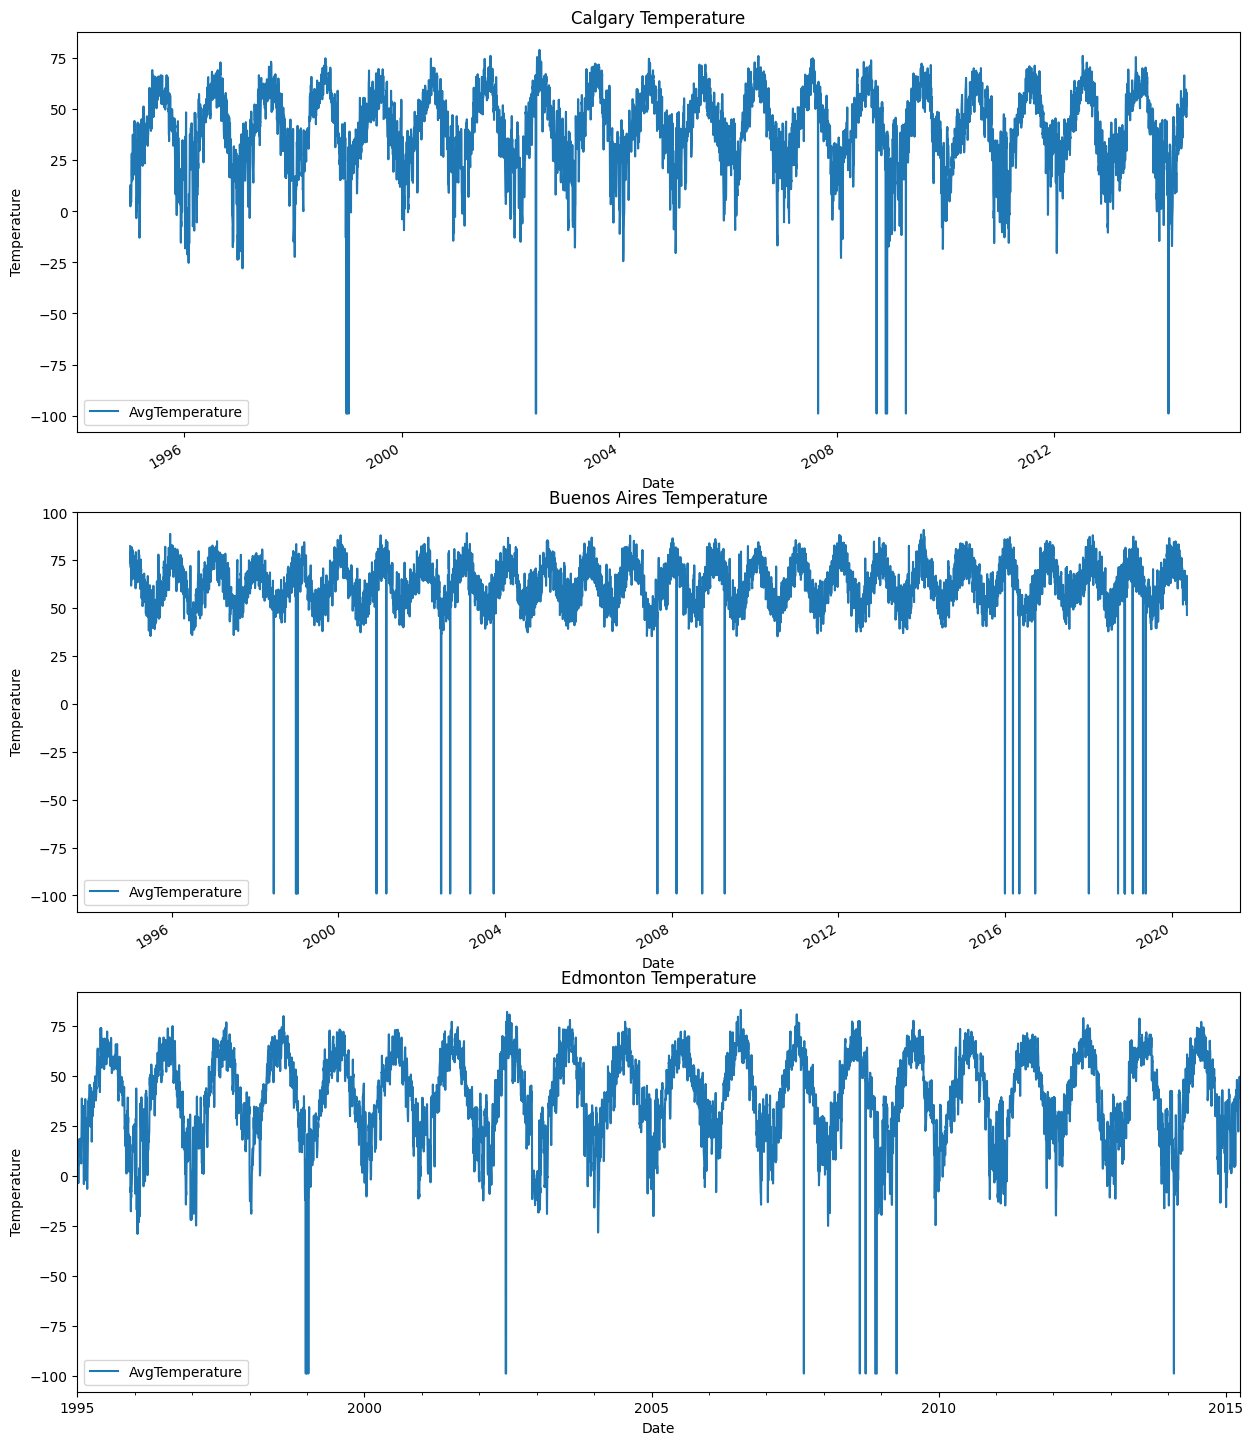

In [31]:
# Plot temperature data for each city in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_df.plot(ax=ax[0], title=f"{city_1} Temperature", xlabel="Date", ylabel="Temperature")
city_2_df.plot(ax=ax[1], title=f"{city_2} Temperature", xlabel="Date", ylabel="Temperature")
city_3_df.plot(ax=ax[2], title=f"{city_3} Temperature", xlabel="Date", ylabel="Temperature")



**Enter answer here:**Before preprocessing, the daily temperature plots for Calgary, Buenos Aires, and Edmonton may exhibit irregularities, outliers, or missing data points, making it challenging to identify consistent patterns over time.

## (b)

In [32]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [33]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE
city_1_monthly = city_1_df.resample('M').mean()
city_2_monthly = city_2_df.resample('M').mean()
city_3_monthly = city_3_df.resample('M').mean()

In [34]:
# Apply exponential smoothing to temperature data with alpha = 0.3

## YOUR CODE STARTS HERE
# Apply exponential smoothing to temperature data with alpha = 0.3
city_1_monthly = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

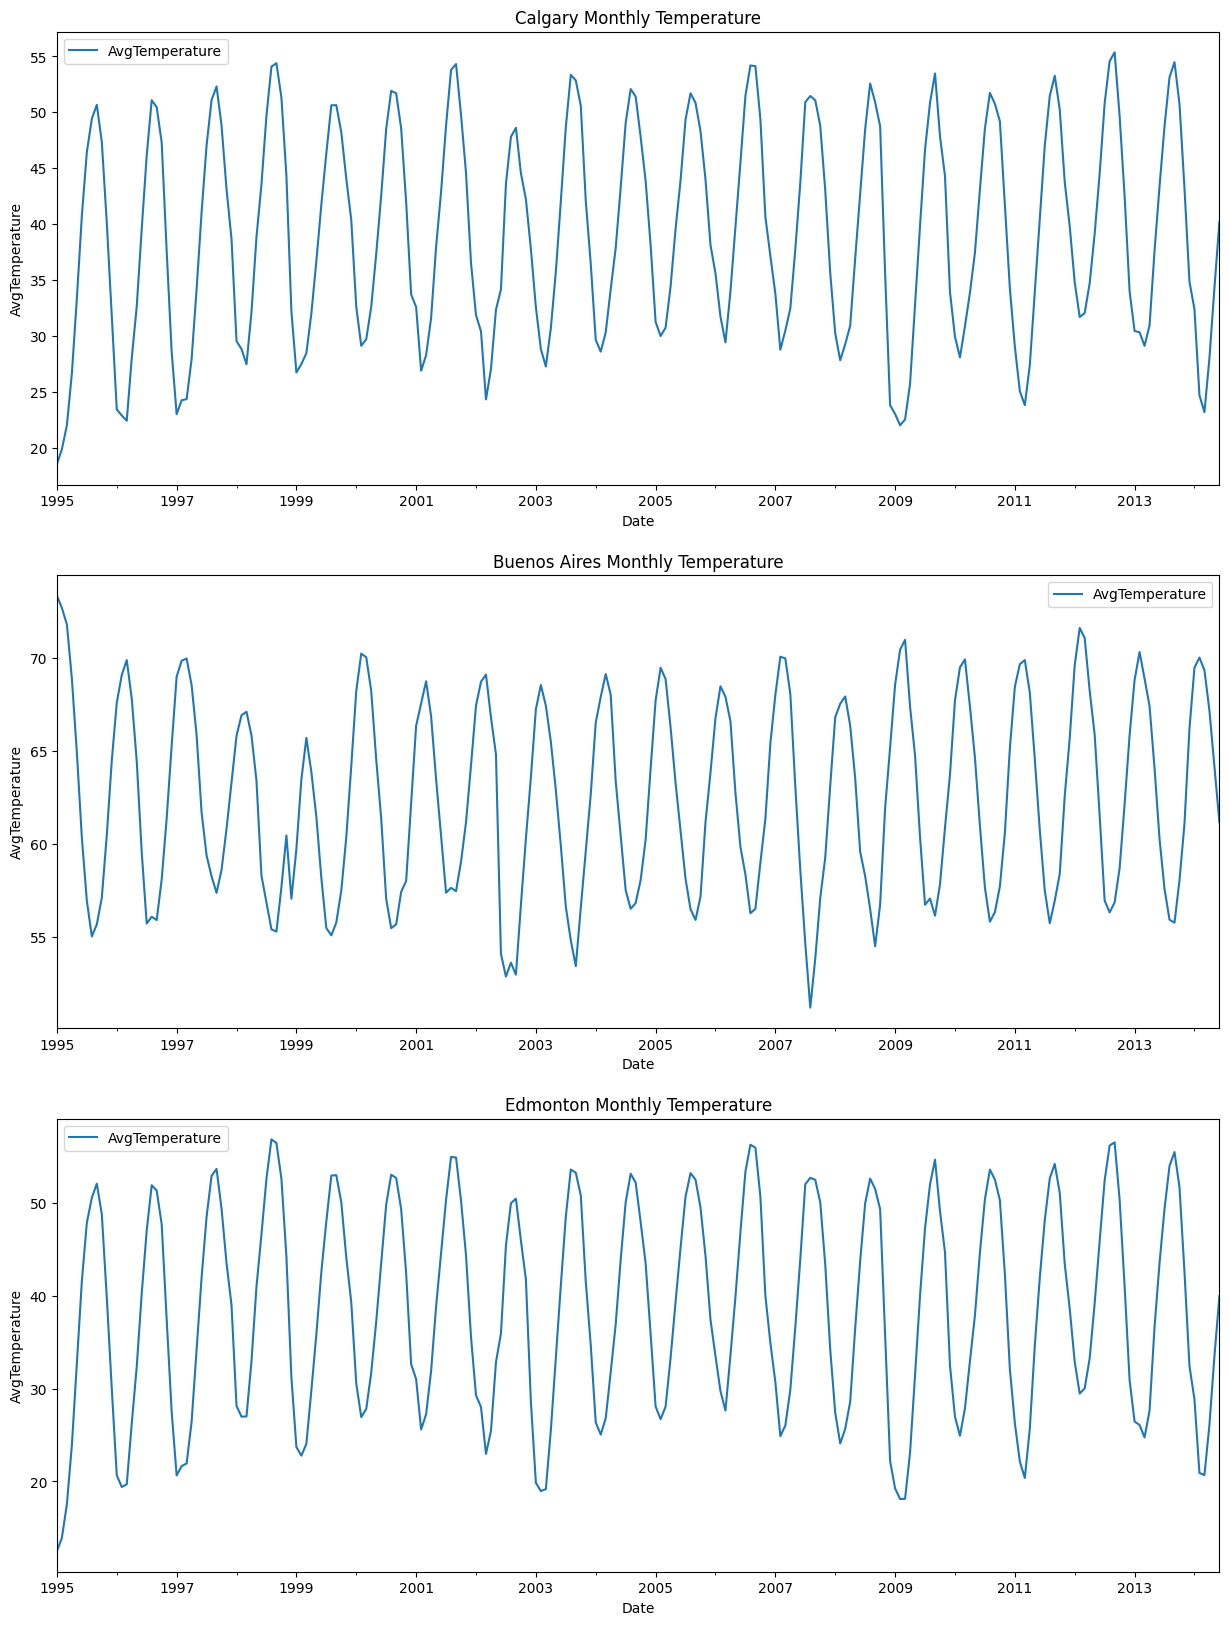

In [35]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_monthly.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_monthly.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_monthly.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** We can see that Calgary and Edmonton have a similar trends in their monthly temperature starting at a low of 18ish, whereas buenos Aires has a completely different trend starting at a high temp then fluctuating up and down. The two cities that would likely be closest to each other in terms of temperature patterns are Calgary and Edmonton. In addition, These cities share geographical proximity and are likely to experience similar climatic conditions

## (c)

Text(0, 0.5, 'Correlation')

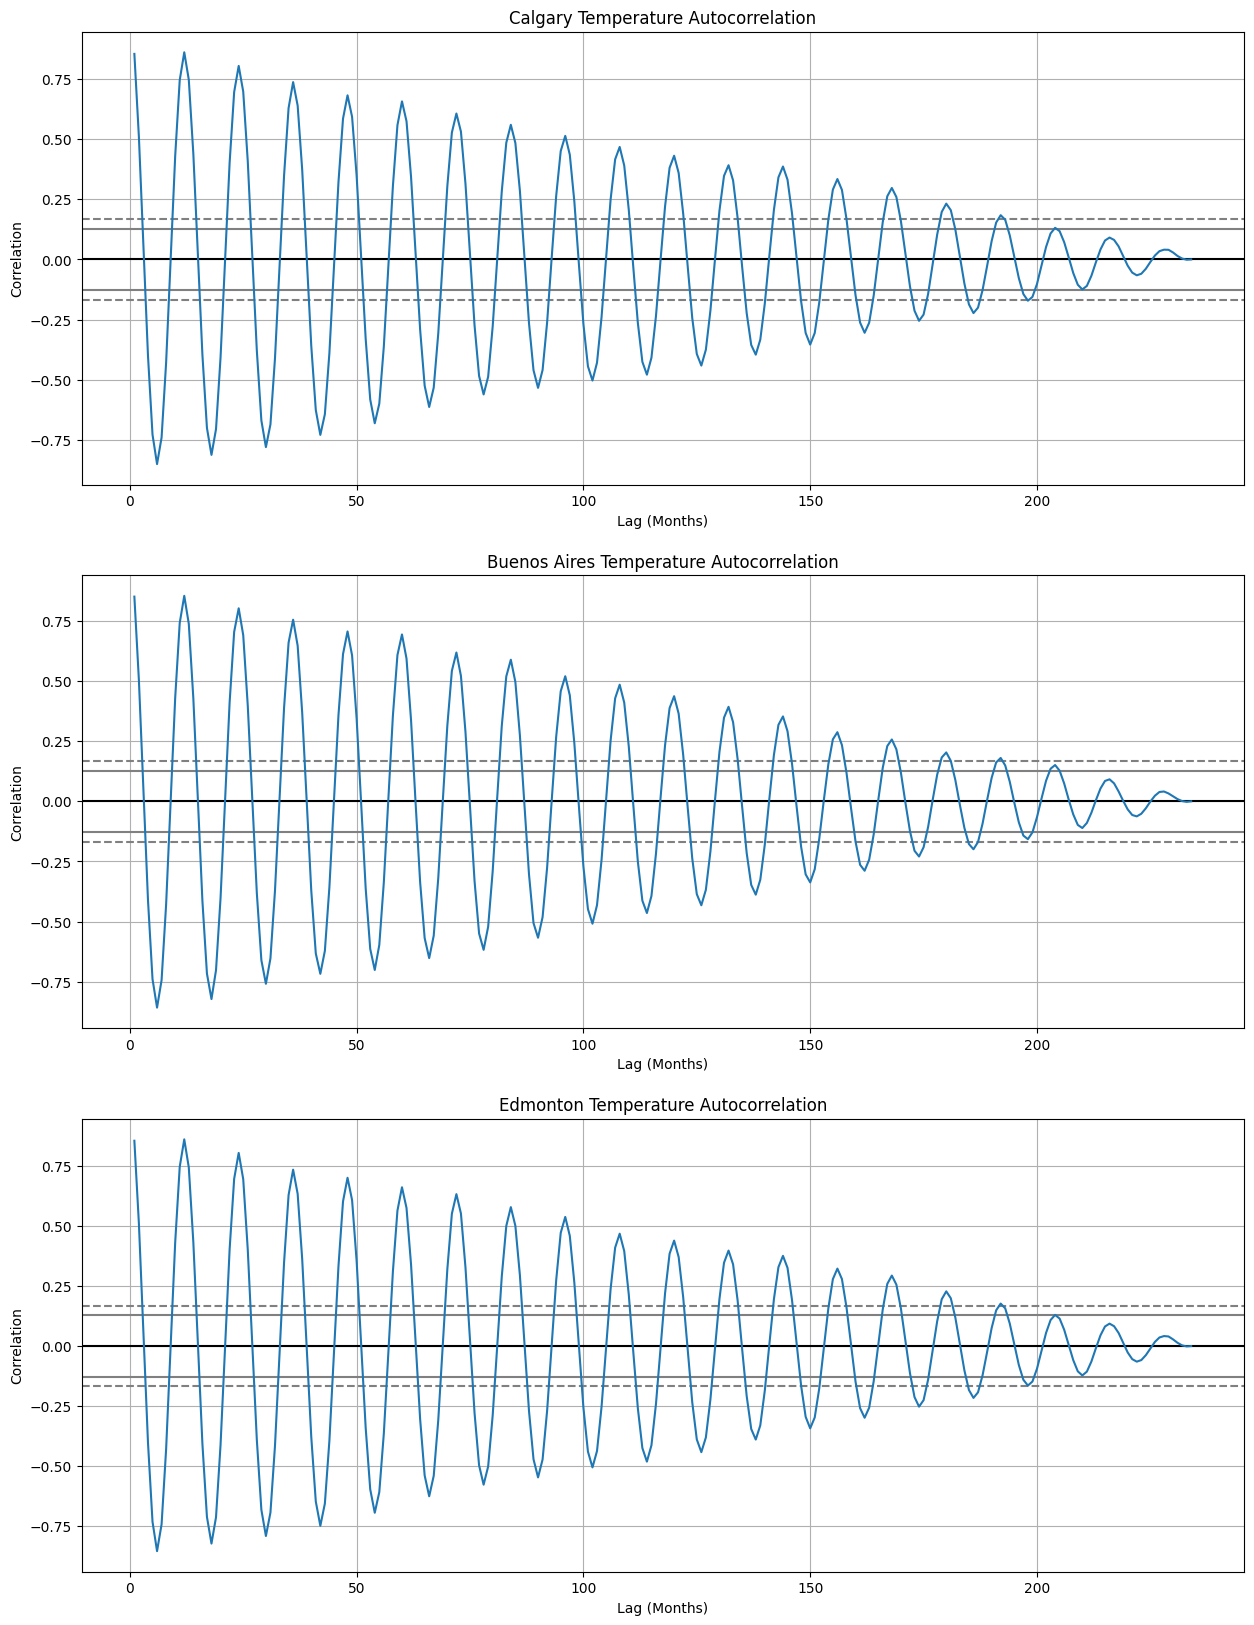

In [36]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

pd.plotting.autocorrelation_plot(city_1_monthly['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:** The autocorrelation plots can potentially confirm patterns observed in Q4(b) by revealing the degree of correlation, for example in Calgary and Edmonton the autocorrelation can confirm similarity. We can see that , the autocorrelation is high at certain lags for both Calgary and Edmonton and this suggests a consistent pattern repeating over time. In additon, insights can be drawn from how autocorrelation changes with lag; decreasing autocorrelation as lag increases may suggest a more random or unpredictable pattern in the data, while sustained autocorrelation may indicate a more consistent, predictable trend.






## (d)

Text(0, 0.5, 'Correlation')

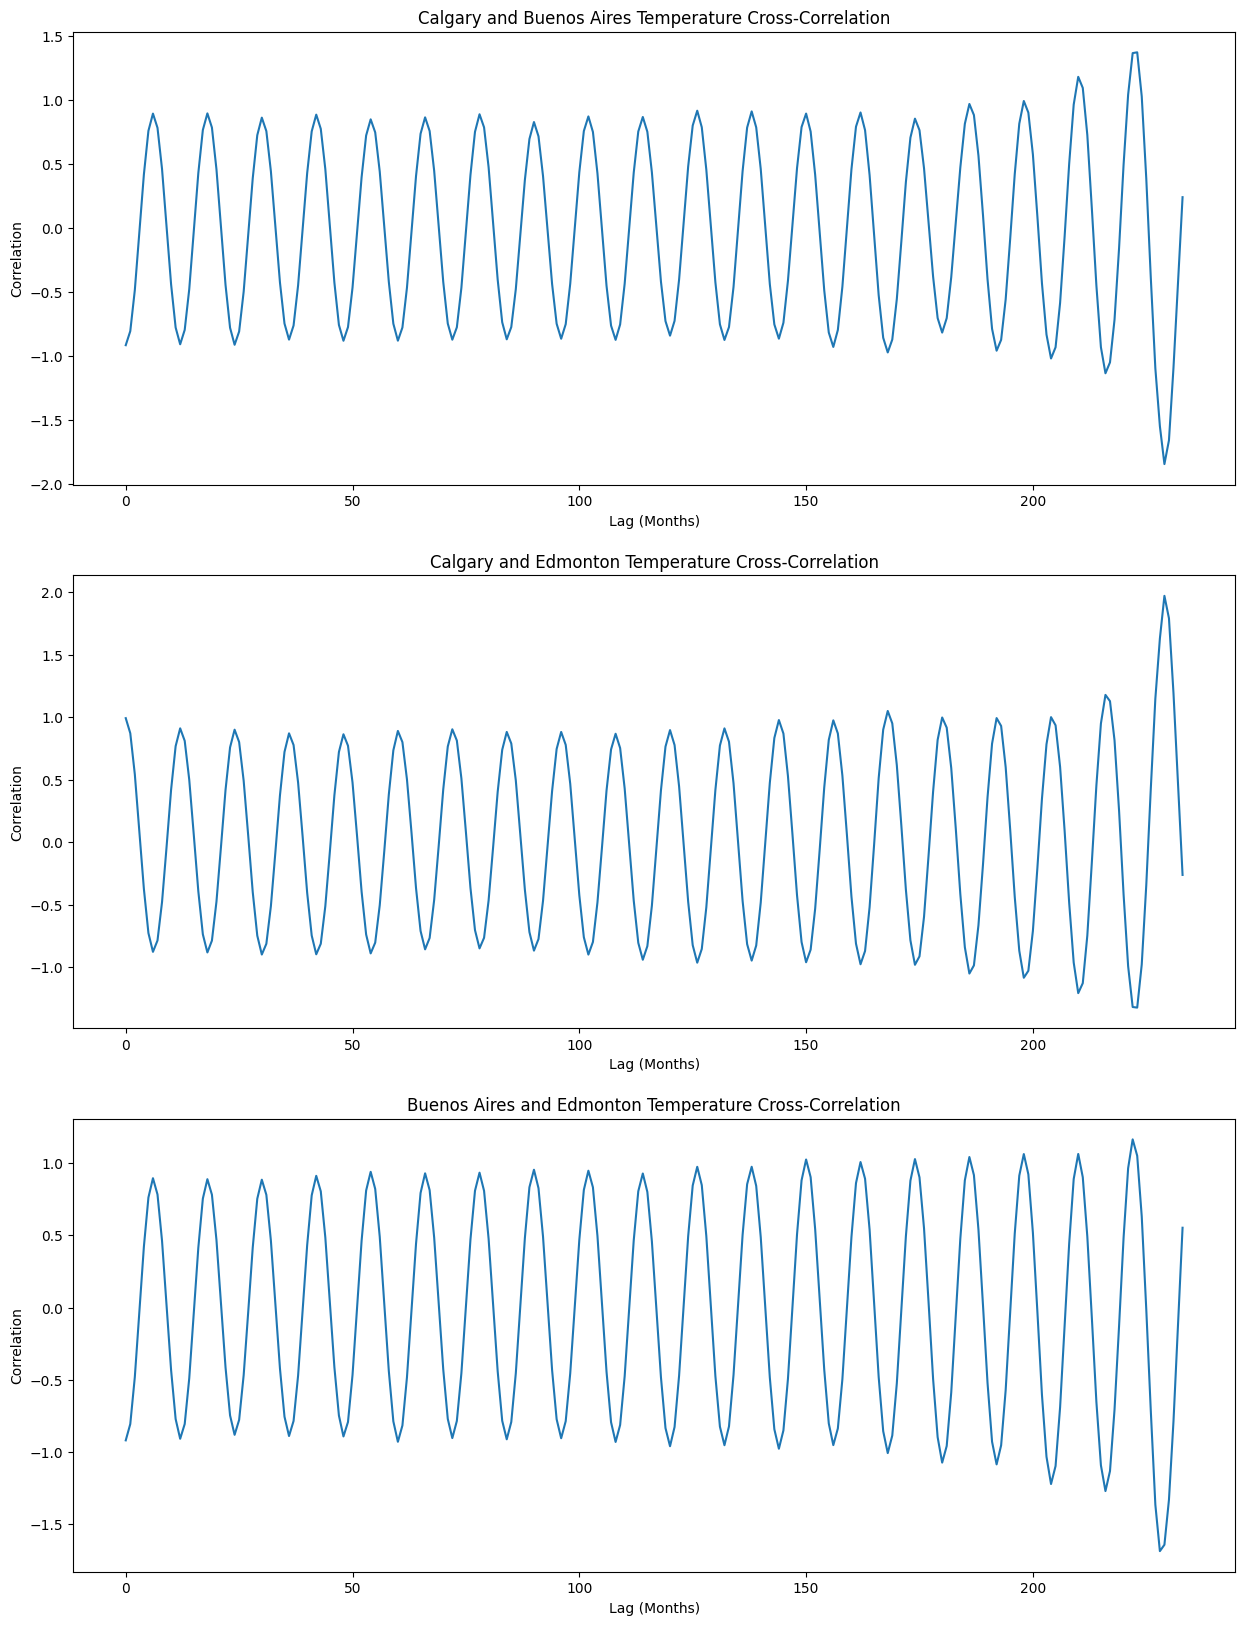

In [37]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

ccf_12 = ccf(city_1_monthly['AvgTemperature'], city_2_monthly['AvgTemperature'])
ccf_13 = ccf(city_1_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])
ccf_23 = ccf(city_2_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])

ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} and {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} and {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_2} and {city_3} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:**We can see that there is a dip in the cross-correlation plot between Calgary and Buenos Aires after the 250-month (approx) point, despite the peak in the Calgary-Edmonton plot around the same lag time, suggests an inverse relationship. When temperatures in Calgary are positively correlated with Edmonton's temperatures, they are negatively correlated with Buenos Aires' temperatures at a similar lag. So When it is summer in Edmonton, then Calgary follows Edmonton temperature with a significant lag (250 months) (seen by peak of 2). However Buenos Aires will probably experience an opposite seasonal cycle ( seen by dip of -1.5 around the same time of peak 2 for Calgary and edmonton)